In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((5,19),-np.inf,dtype=object)

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0886080201_M212grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.048e-03 +/- 4.667e-04 (70.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 2.142e+04 sec
 Using fit statistic: chi
 Using Background File                0886080201_M212spec_bkg.fits
  Background Exposure Time: 2.142e+04 sec
 Using Response (RMF) File            0886080201_M212spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886080201_M212spec.arf



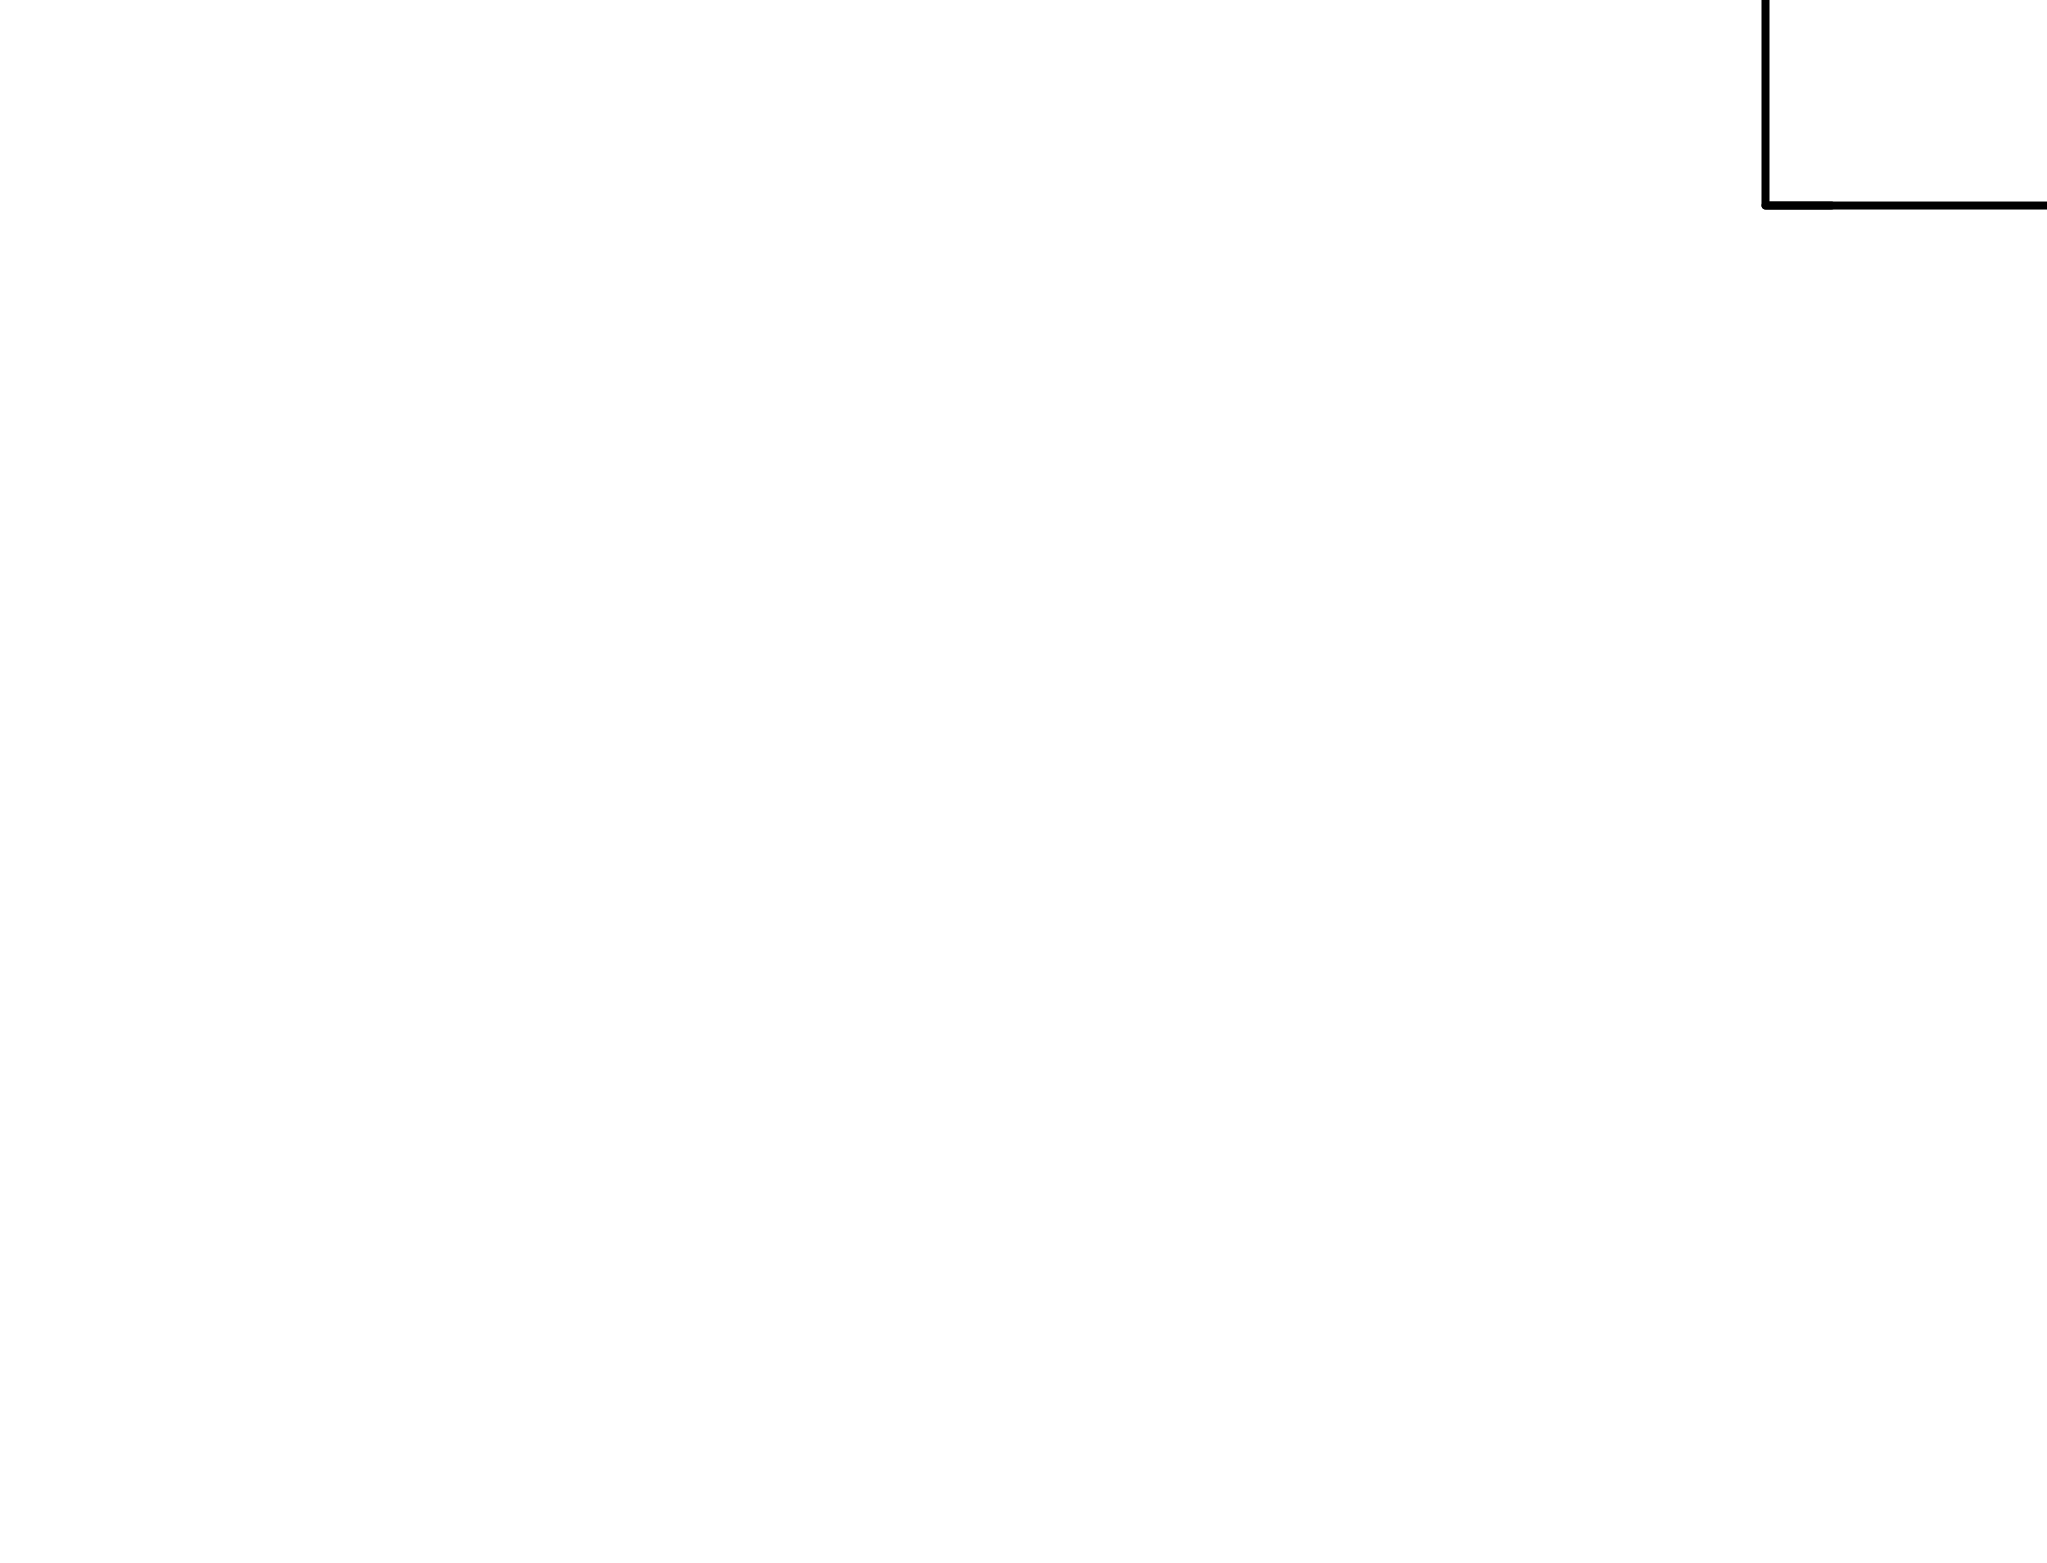

In [3]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              7.670543e+11     using 6 bins.

Tes

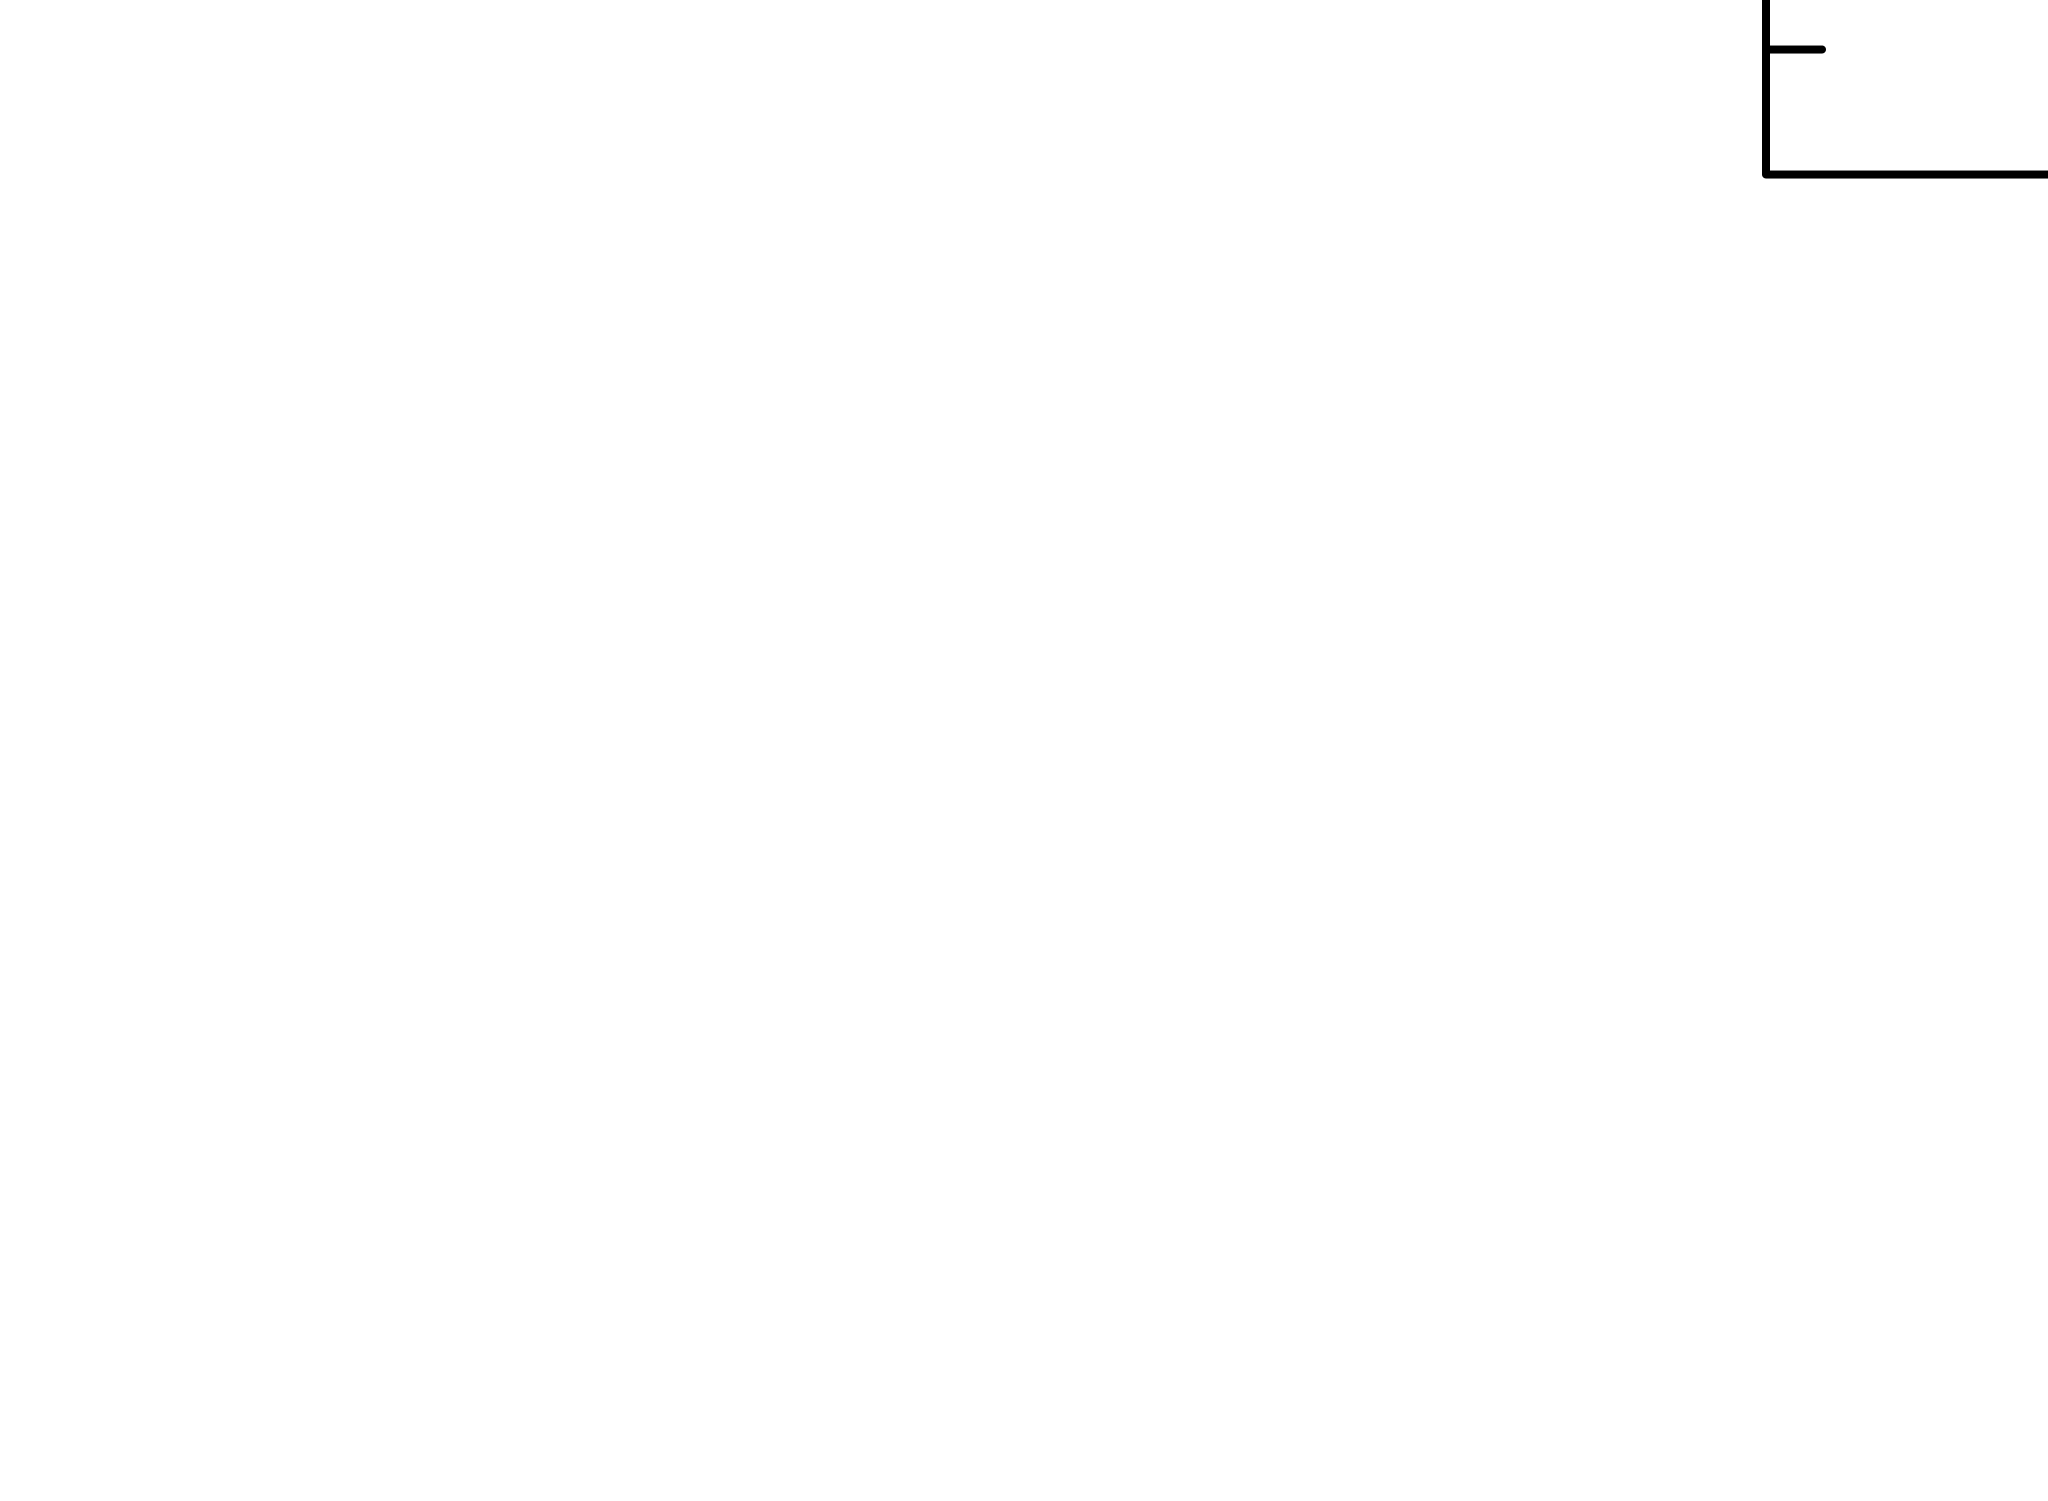

In [4]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
     1            0      1.56886    (-0.169308,1.39956)
 Parameter   Confidence Range (2.706)
     2     0.638676      1.88943    (-0.46193,0.788825)


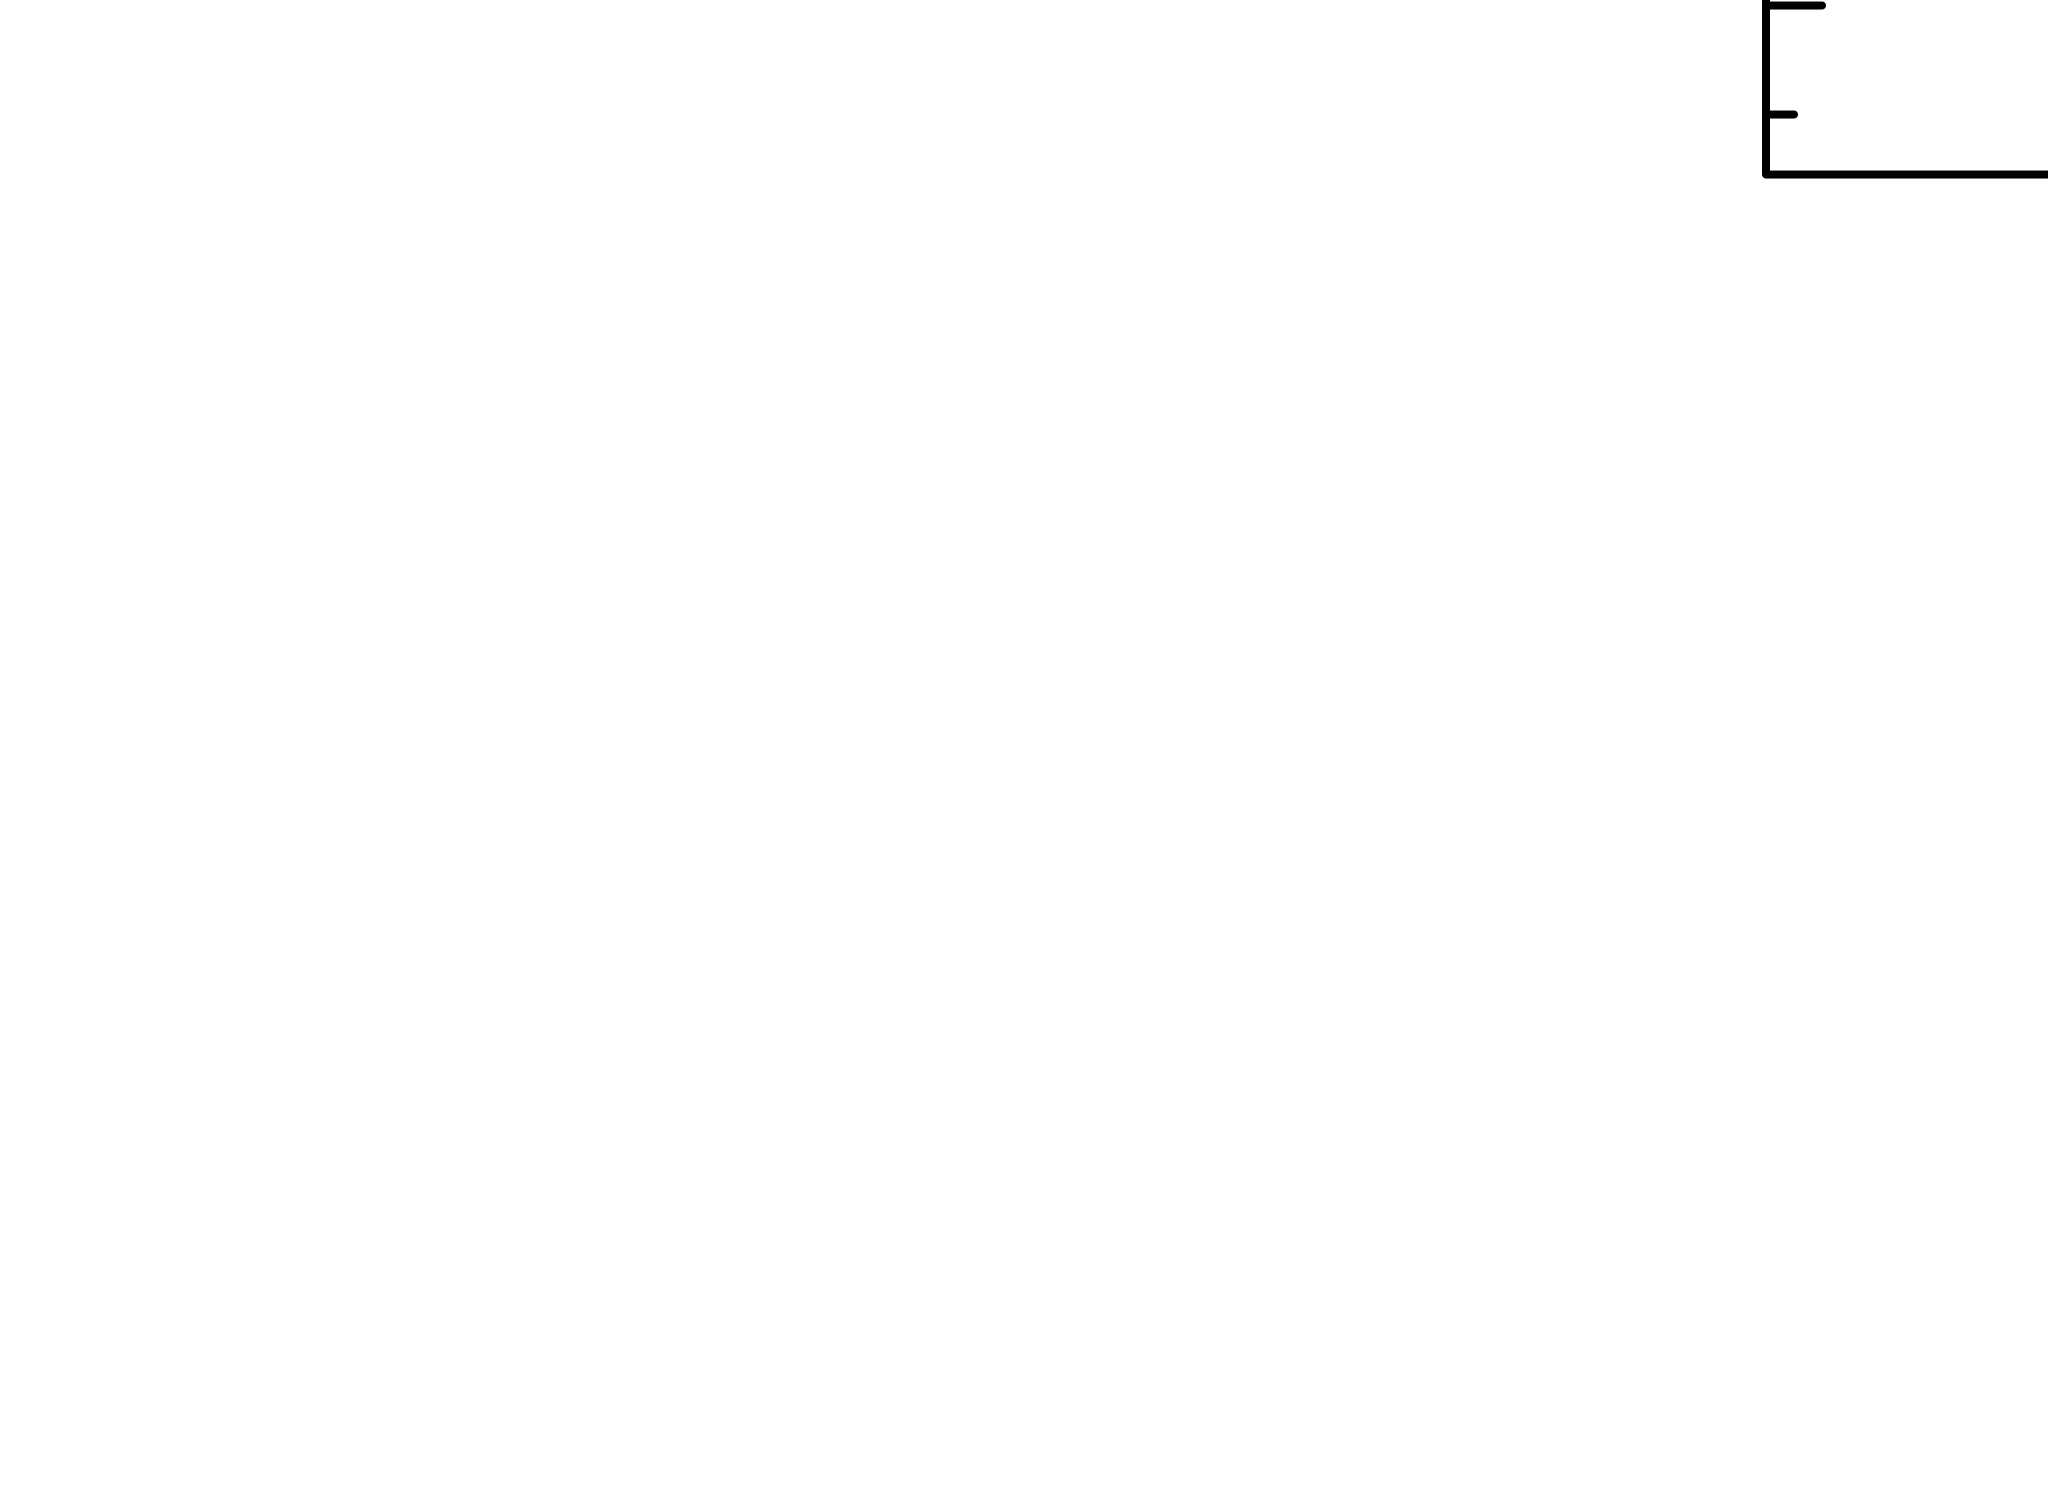


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.073675e+10     using 6 bins.

Test statistic : Chi-Squared              3.073675e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
2.03971      0.223833     -1      0.970846       10.1136   3.40810e-05
1.93018      14488.6      -1      0.873230       15.9339   3.29341e-05
1.79507      19099        -2      0.768542       28.4227   3.39769e-05
1.7

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.343611      2.24537    (-0.39872,1.50304)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 1 is pegged at 0.742331 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
 Parameter 3 is pegged at 4.21077e-05 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

 Fit error occurred during lower bound error calculation.

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 0.00933771

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2            0            0    (-77.9002,-77.9002)



***XSPEC Error:  No variable parameters for fit 


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.874733e+11     using 6 bins.

Test statistic : Chi-Squared              1.874733e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
2.18755      1.37391      -3      0.523846       1.16572   1.60285e-05
1.69895      48262.2      -4      0.726184       1.26878   1.84823e-05
1.6781       3826.64      -5      0.803322       1.32488   2.01895e-05
1

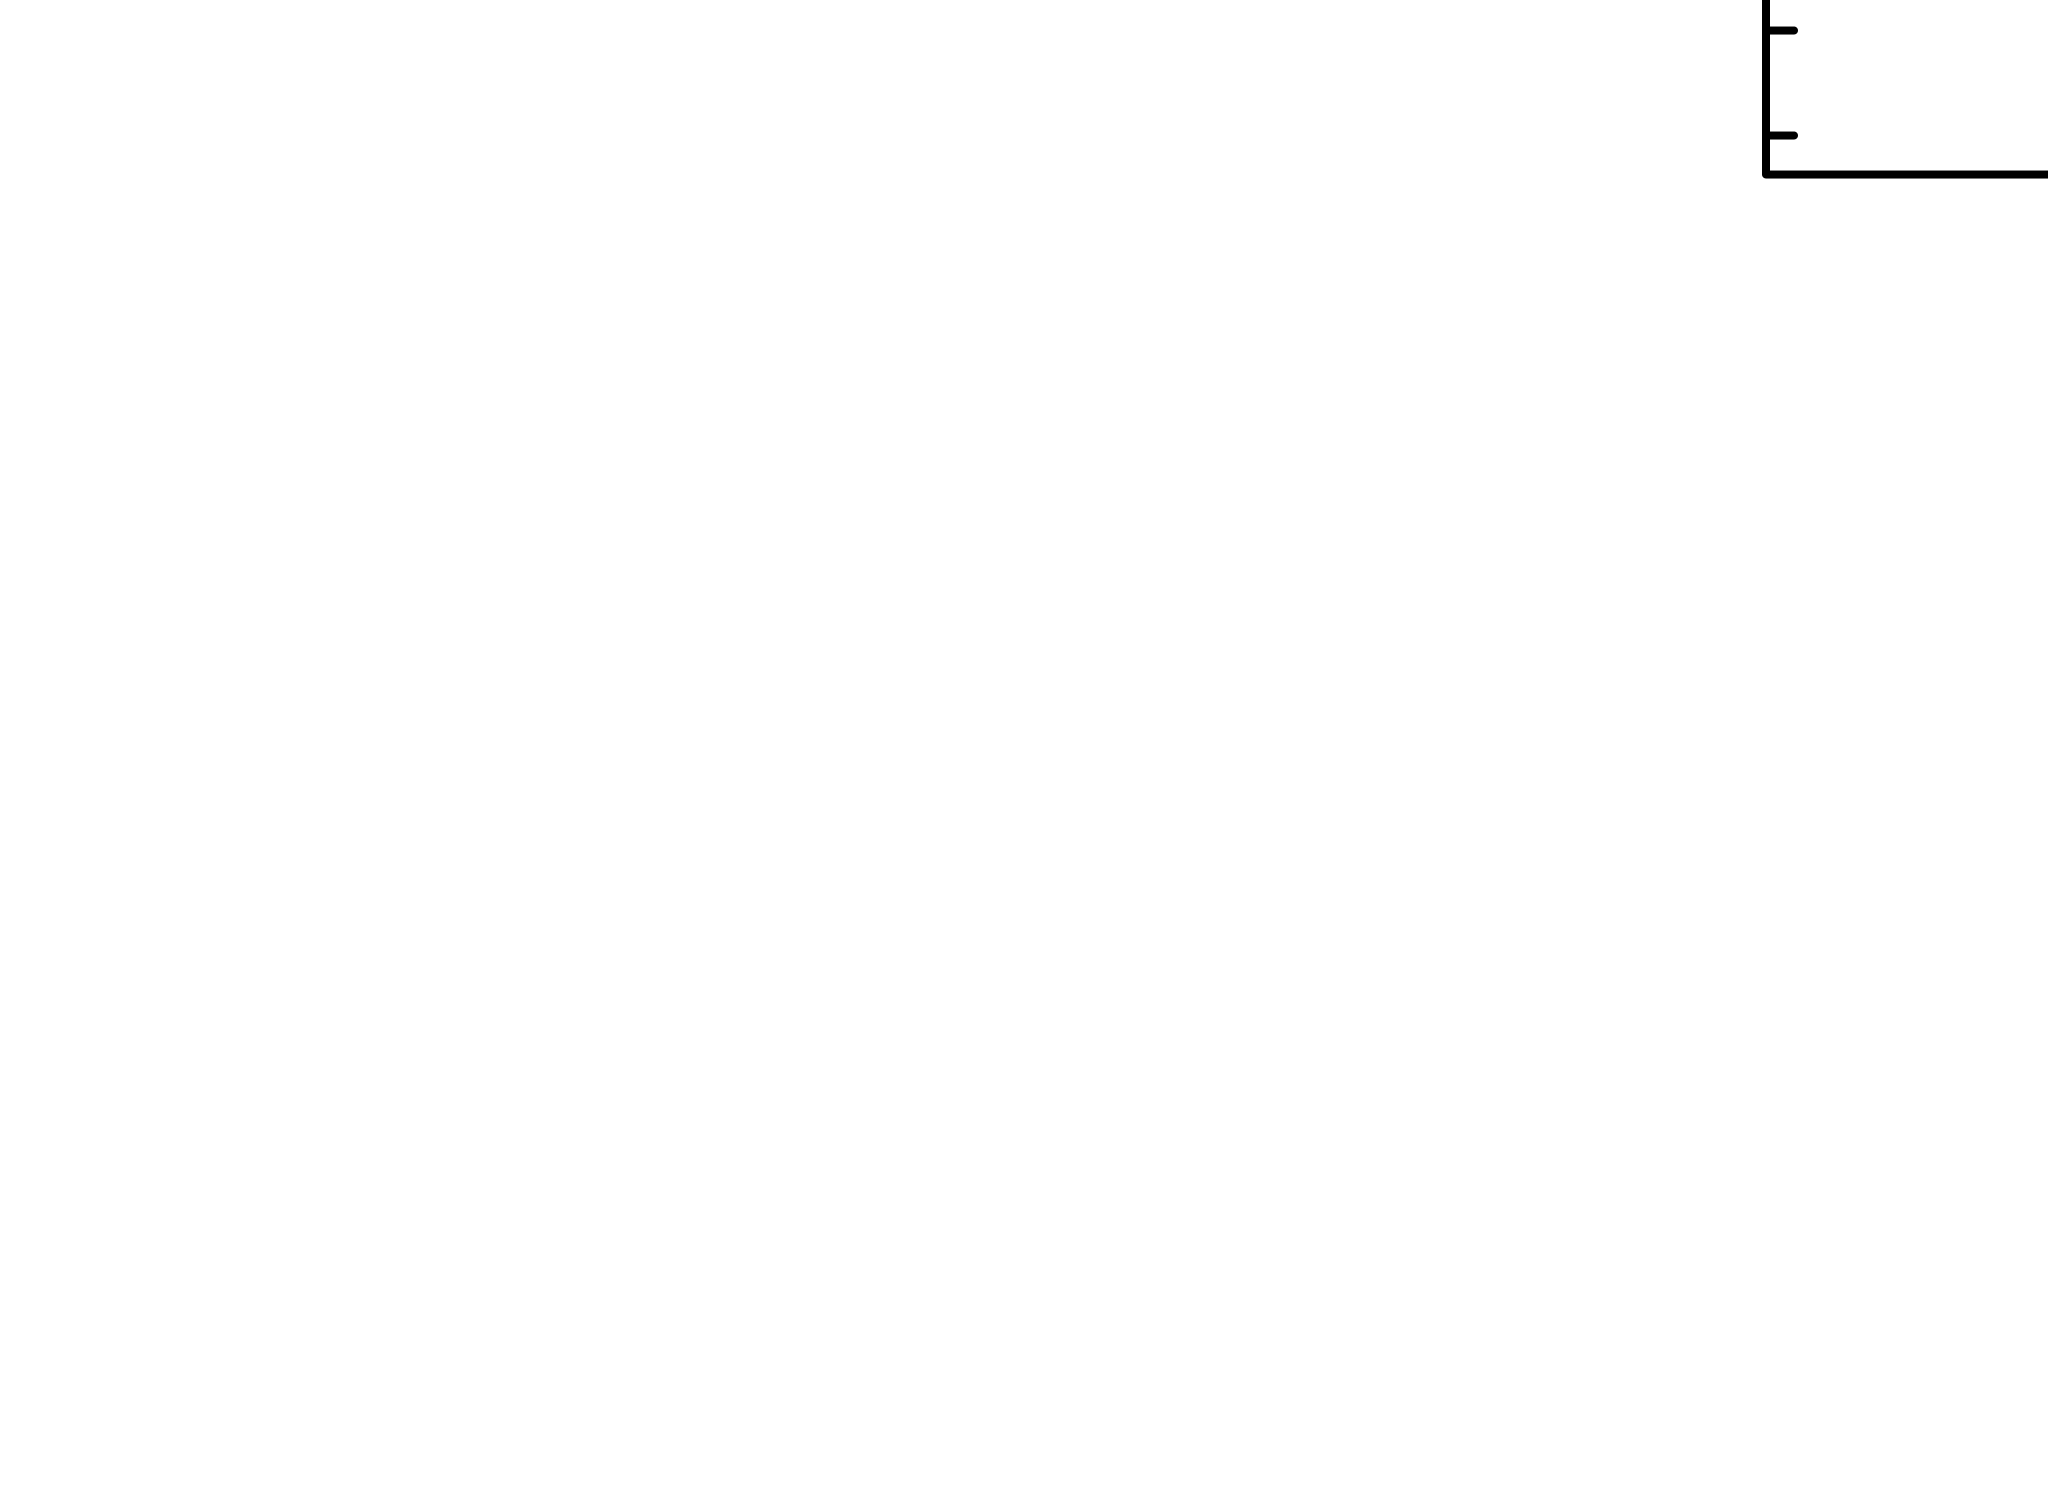

In [8]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1    0.0499972      3.06786    (-0.767827,2.25004)
 Parameter   Confidence Range (2.706)
     2     0.281596      3.15904    (-1.05813,1.81932)



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.978808e+09     using 6 bins.

Test statistic : Chi-Squared              6.978808e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
12.0472      4.45423      -3       1.56880       1.67065   9.7

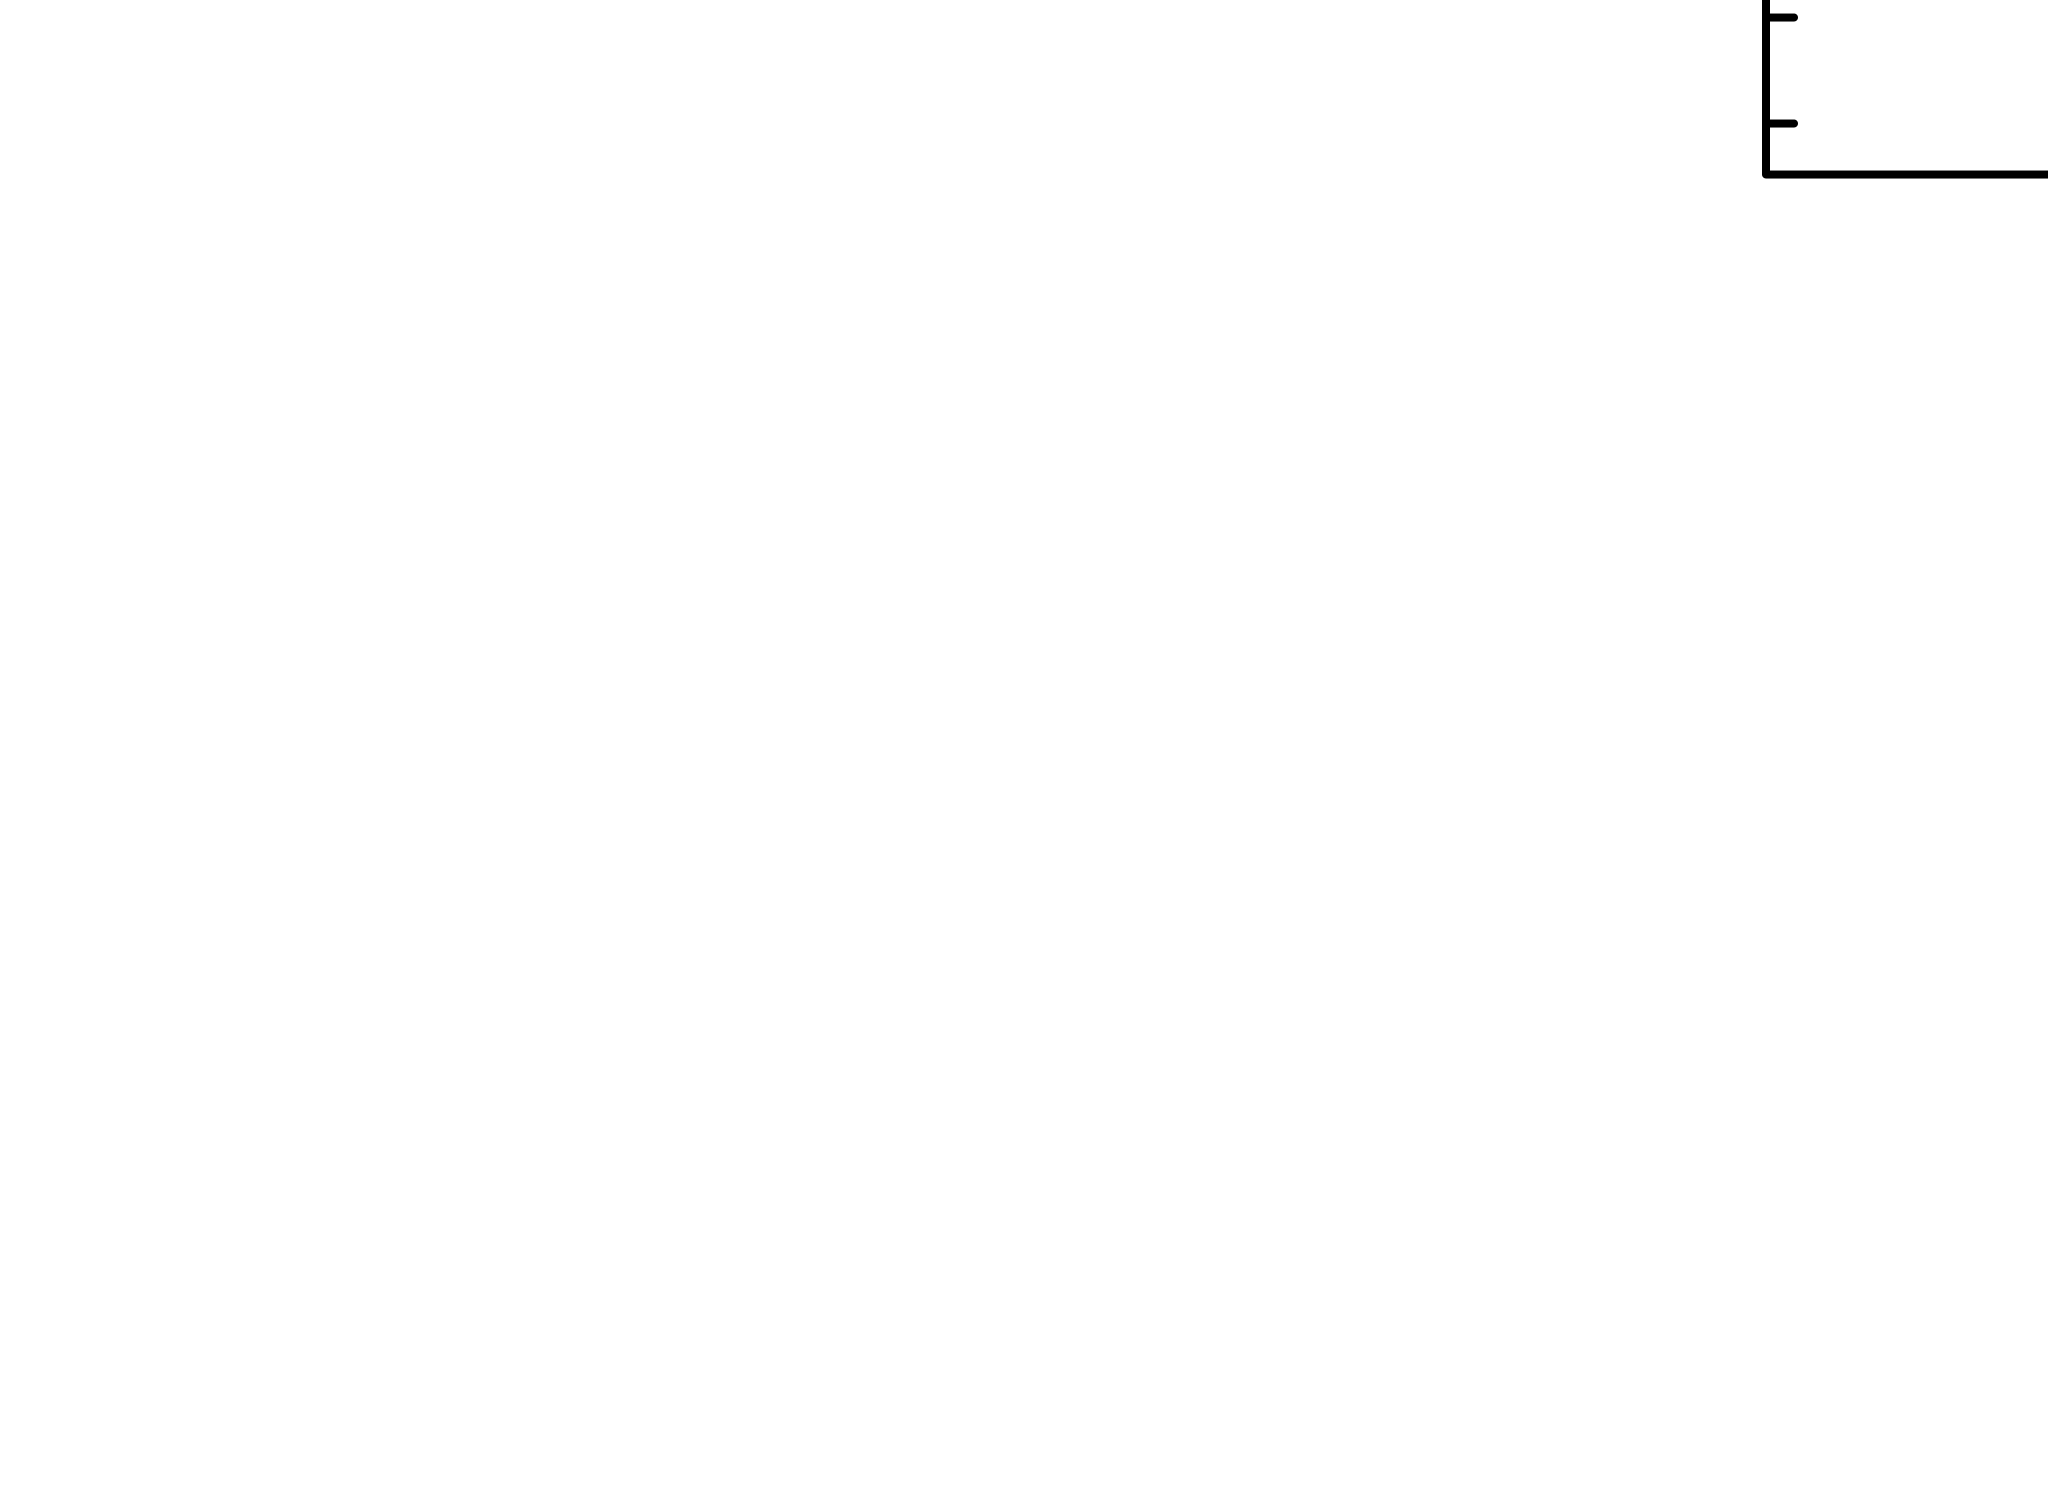

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.362508      2.58232    (-0.59108,1.62873)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before convergence.
Current trial values 3.36844, 1.68822
and delta statistic 0.82603, 3.3683

Continue error search in this direction? ***Warning: Parameter pegged at hard limit: 64
     2      2.04592            0    (-8.91465,-10.9606)


In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.4091e-05 photons (1.5834e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [13]:
#plx = 2.3643
d_kpc = 8
F_x = 1.5839*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.21252085101097e+33


In [14]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.08368921564638


In [15]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.4585384597371174



Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.553596e+09     using 6 bins.

Test statistic : Chi-Squared              4.553596e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.099734e+07     using 6 bins.

Test statistic : Chi-Squared              2.099734e+07     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degree

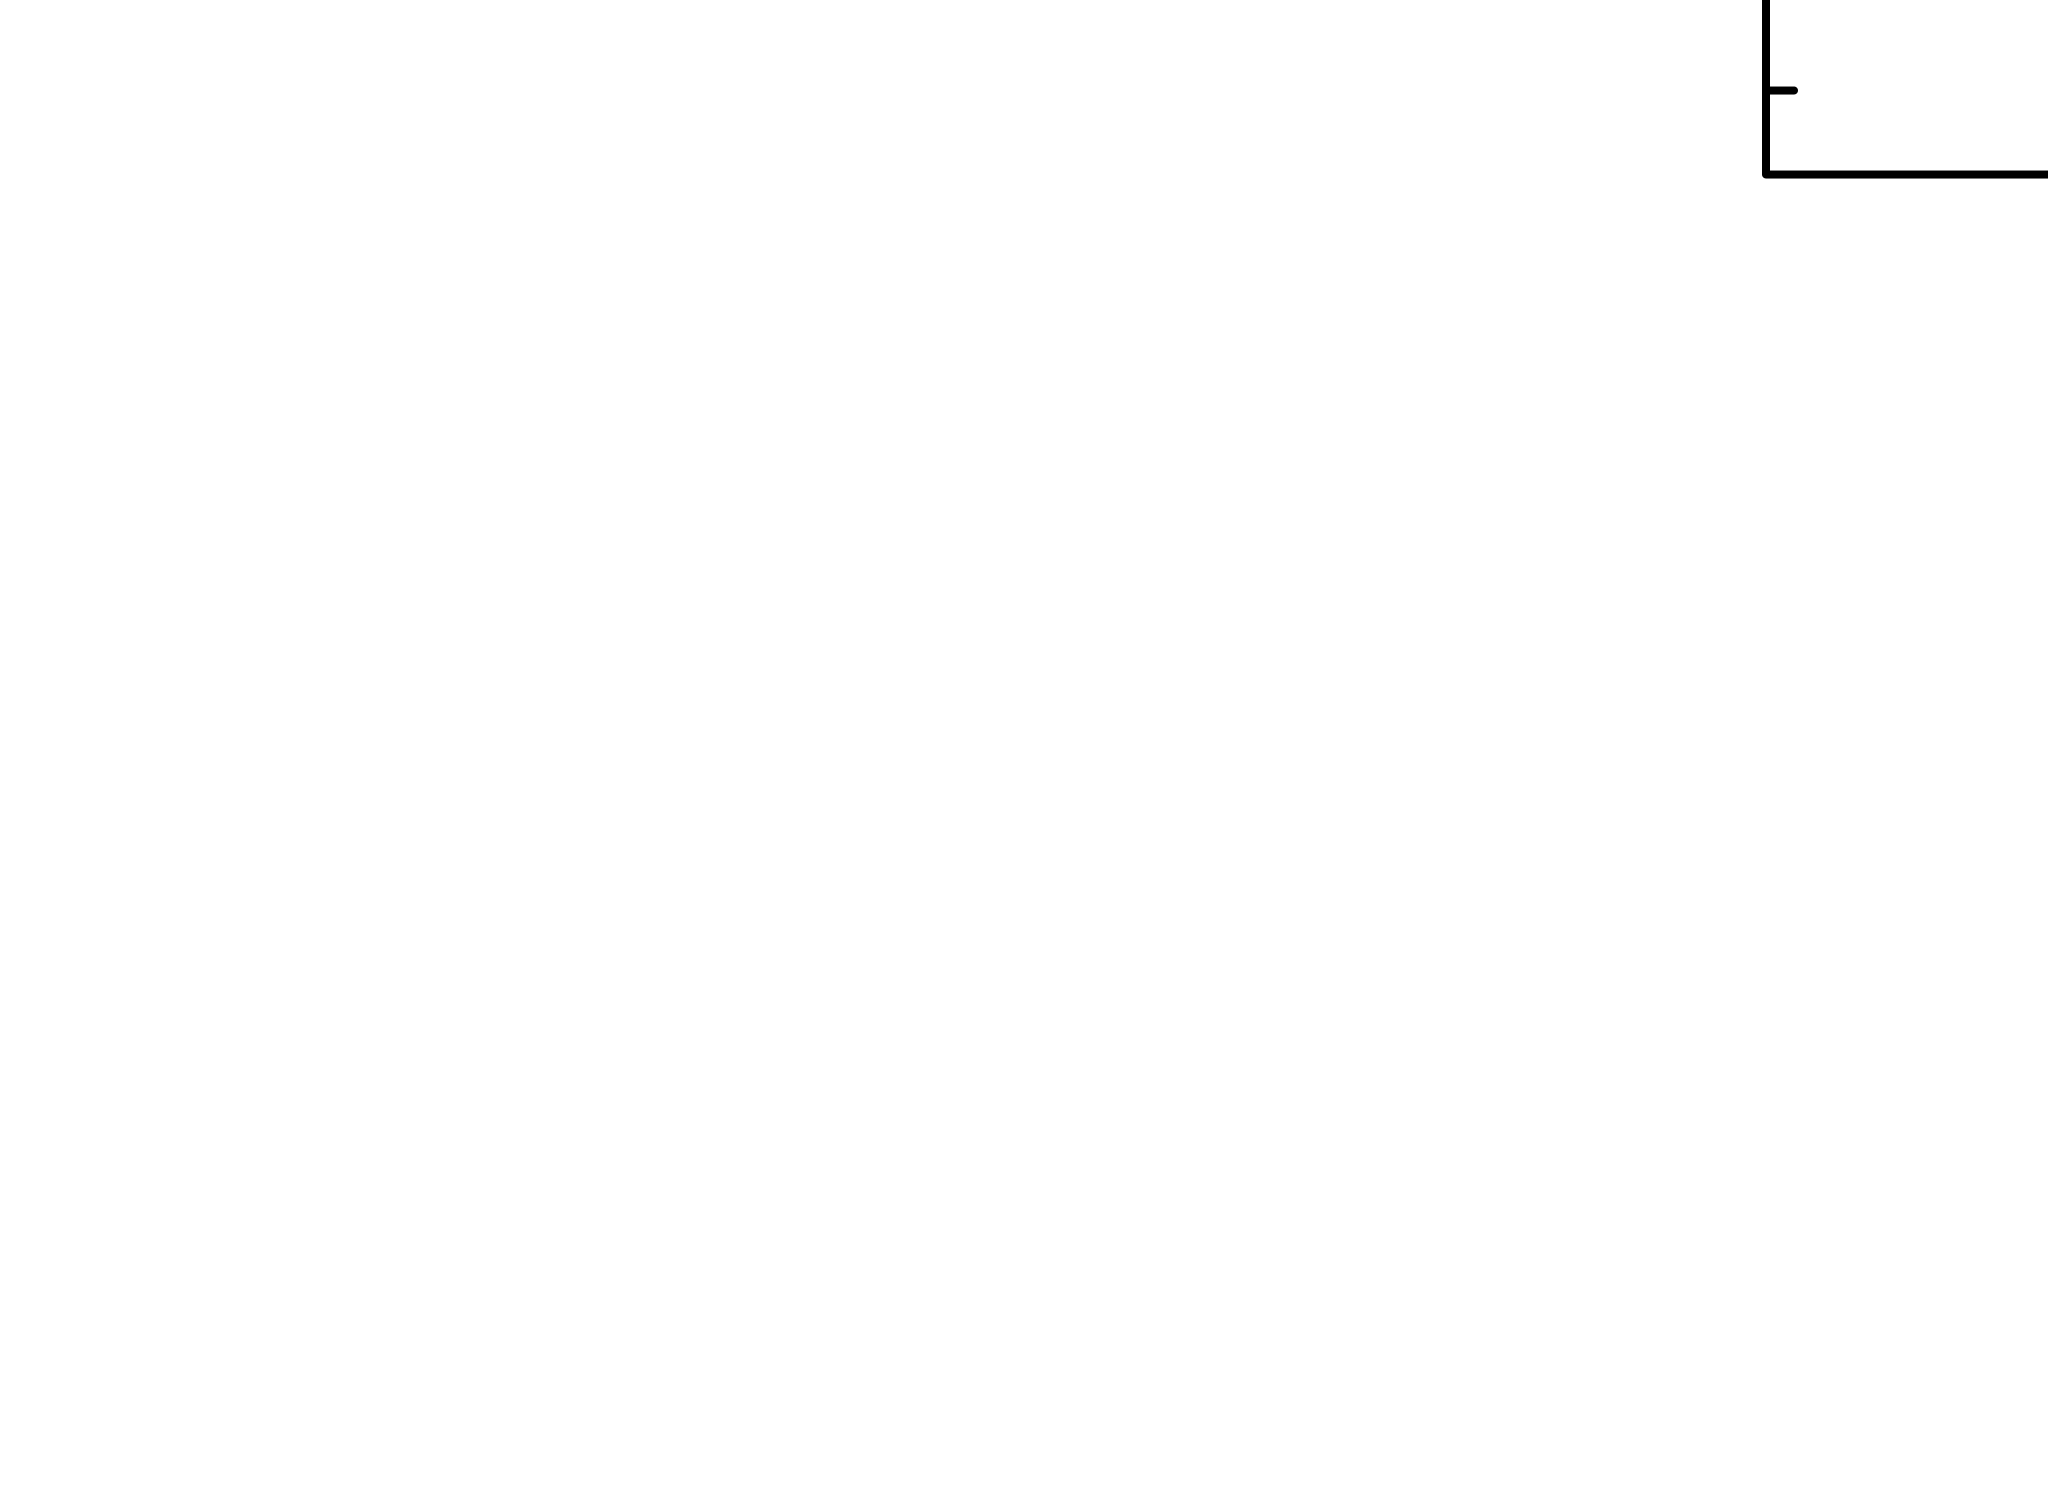

In [16]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.TBabs.nH = 7
mo.raymond.Abundanc=0.3
Fit.perform()
Plot("data resid")

In [17]:
Fit.error("1")
Fit.error("2")

out_arr[4,0] = 'raymond'
out_arr[4,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[4,13] = mo.raymond.Abundanc.values[0]
out_arr[4,4:7] = mo.raymond.kT.values[0], mo.raymond.kT.values[0] - mo.raymond.kT.error[0], mo.raymond.kT.error[1] - mo.raymond.kT.values[0]
out_arr[4,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.362872      2.38495    (-0.399048,1.62303)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before convergence.
Current trial values 8.94142, 0.008
and delta statistic 0.200609, 43.0961

Continue error search in this direction? ***Warning: Parameter pegged at hard limit: 64
     2      4.47471            0    (-52.7731,-57.2478)


In [18]:
np.savetxt('spec28_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')
